<p align="center">
    <img src="https://private-user-images.githubusercontent.com/46355364/238023617-a0f5e7af-d8d6-4ce8-9e71-47376baa35f2.jpeg?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJrZXkiOiJrZXkxIiwiZXhwIjoxNjg0MzA5NzExLCJuYmYiOjE2ODQzMDk0MTEsInBhdGgiOiIvNDYzNTUzNjQvMjM4MDIzNjE3LWEwZjVlN2FmLWQ4ZDYtNGNlOC05ZTcxLTQ3Mzc2YmFhMzVmMi5qcGVnP1gtQW16LUFsZ29yaXRobT1BV1M0LUhNQUMtU0hBMjU2JlgtQW16LUNyZWRlbnRpYWw9QUtJQUlXTkpZQVg0Q1NWRUg1M0ElMkYyMDIzMDUxNyUyRnVzLWVhc3QtMSUyRnMzJTJGYXdzNF9yZXF1ZXN0JlgtQW16LURhdGU9MjAyMzA1MTdUMDc0MzMxWiZYLUFtei1FeHBpcmVzPTMwMCZYLUFtei1TaWduYXR1cmU9NDMxYWIxOGMxNGIxODI5YzI1MzM3YjdlMmFlZjZmNmZmYWI1YzI0ZGU3MzMxNmY5YTdmNDk0NTZiMmIyZjMzZCZYLUFtei1TaWduZWRIZWFkZXJzPWhvc3QifQ.XqGEL9QCAHnnldryiRb7VZ16ERKHspbv3mCXL1-3ABc" alt="Logo">

The Financial Toolkit is complimented very well with the [Finance Database 🌎](https://github.com/JerBouma/FinanceDatabase), a database that features 300.000+ symbols containing Equities, ETFs, Funds, Indices, Currencies, Cryptocurrencies and Money Markets. By utilising both, it is possible to do a fully-fledged competitive analysis with the tickers found from the FinanceDatabase inputted into the FinancialToolkit.

To install the **FinanceDatabase** it simply requires the following:

```cli
pip install financedatabase -U
````

From within Python use:

```python
import financedatabase as fd
```

For a detailed explanation of how to use the Finance Database, please see the GitHub page as found [here](https://github.com/JerBouma/FinanceDatabase).

In [1]:
from financialtoolkit import Toolkit
import financedatabase as fd

API_KEY = "9d08b12c4a88cc5e1f811a4c25a7f102"

Lets start with searching for companies matching the industry `Road & Rail` in the `United States` that are defined as `Large Cap`.

In [2]:
# Initialize the Equities database
equities = fd.Equities()

# Obtain related companies
road_and_rail = equities.search(
    industry="Road & Rail",
    country="United States",
    market_cap="Large Cap",
    exclude_exchanges=True,
)

# Show the related DataFrame
road_and_rail

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
CSX,CSX Corporation,"CSX Corporation, together with its subsidiarie...",USD,Industrials,Transportation,Road & Rail,NMS,NASDAQ Global Select,United States,FL,Jacksonville,32202,http://www.csx.com,Large Cap,US1264081035,126408103,BBG000BGK1N1,BBG000BGJRC8,BBG001S5Q7Q3
KSU,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
KSU-P,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
NSC,Norfolk Southern Corporation,"Norfolk Southern Corporation, together with it...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,VA,Norfolk,23510-2191,http://www.norfolksouthern.com,Large Cap,US6558441084,655844108,BBG000BQ5GM4,BBG000BQ5DS5,BBG001S5TQJ6
UNP,Union Pacific Corporation,"Union Pacific Corporation, through its subsidi...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,NE,Omaha,68179,http://www.up.com,Large Cap,US9078181081,907818108,BBG000BW3413,BBG000BW3299,BBG001S5X2M0
WAB,Westinghouse Air Brake Technologies Corporation,Westinghouse Air Brake Technologies Corporatio...,USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212,http://www.wabteccorp.com,Large Cap,US9297401088,929740108,BBG000BDDBD5,BBG000BDD940,BBG001S5XBT3


It appears that Kansas City Southern has been merged with Canadian Pacific Railway ([source](https://www.kcsouthern.com/media/news/news-releases/canadian-pacific-and-kansas-city-southern-combination-approved-by-u-s-surface-transportation-board)). Because of this, the ticker is taken out. The reason it still exists in the dataset of the FinanceDatabase is to control for survivorship bias.

In [3]:
road_and_rail = road_and_rail.drop(["KSU", "KSU-P"])

From here on, the tickers from the dataset are used to initialize the Financial Toolkit.

In [4]:
rail_companies = Toolkit(list(road_and_rail.index), api_key=API_KEY)

Let's start by showing the historical prices and plotting them accordingly.

Adj Close                                         Close  \
                  CSX         NSC         UNP        WAB        CSX   
Date                                                                  
2023-05-10  31.809999  208.500000  199.059998  97.750000  31.809999   
2023-05-11  31.790001  210.309998  198.080002  98.080002  31.790001   
2023-05-12  31.820000  211.910004  198.990005  97.989998  31.820000   
2023-05-15  32.009998  212.919998  199.639999  98.330002  32.009998   
2023-05-16  31.680000  212.460007  196.869995  96.660004  31.680000   

                                                    High              ...  \
                   NSC         UNP        WAB        CSX         NSC  ...   
Date                                                                  ...   
2023-05-10  208.500000  199.059998  97.750000  32.330002  210.479996  ...   
2023-05-11  210.309998  198.080002  98.080002  31.910000  211.309998  ...   
2023-05-12  211.910004  198.990005  97.989998  32.049999  212.020004  ...   
2023-05-15  212.919998  199.639999  98.330002  32.220001  214.570007  ...   
2023-05-16  212.460007  196.869995  96.660004  31.969999  213.660004  ...   

                   Low                  Open                          \
                   UNP        WAB        CSX         NSC         UNP   
Date                                                                   
2023-05-10  196.910004  96.290001  32.250000  209.789993  202.119995   
2023-05-11  197.050003  96.459999  31.750000  209.270004  198.729996   
2023-05-12  197.369995  97.120003  31.799999  211.410004  199.429993   
2023-05-15  197.520004  97.089996  31.860001  212.550003  198.830002   
2023-05-16  196.500000  96.300003  31.900000  213.259995  199.119995   

                         Volume                             
                   WAB      CSX      NSC      UNP      WAB  
Date                                                        
2023-05-10  100.000000  9976300  1591400  1703500   910300  
2023-05-11   96.459999  6927300  1802600  1397200  1032400  
2023-05-12   98.779999  6915300  1250700  1459500  1207700  
2023-05-15   98.019997  6837400  1312700  1630500   897800  
2023-05-16   97.580002  7801600  1157600  1893900   716500  

[5 rows x 24 columns]

<Axes: xlabel='Date'>

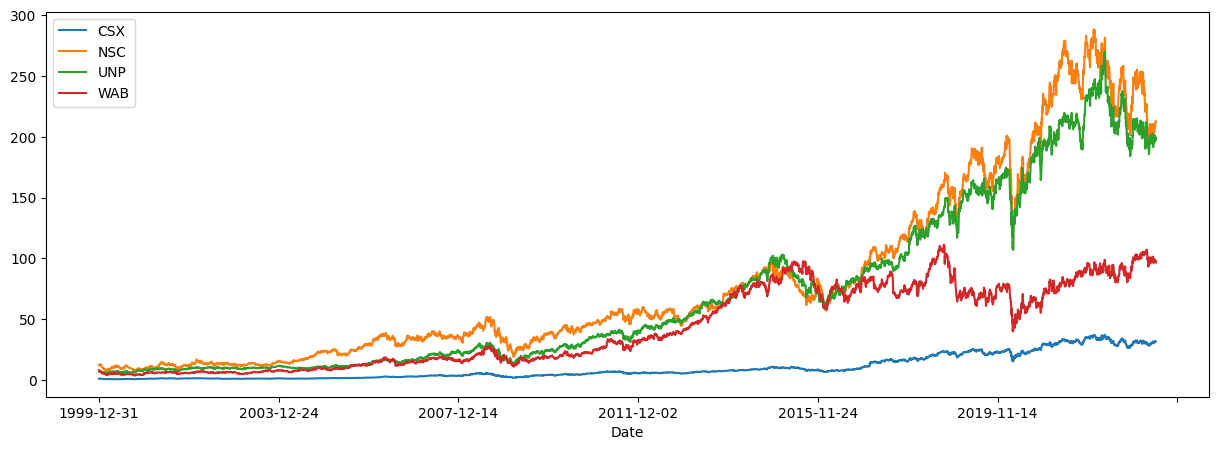

In [5]:
# Collect Historical Data for each ticker
historical_data = rail_companies.get_historical_data(start="2000-01-01")

# Show a portion of the dataset
display(historical_data.tail(5))

# Plot the Adjusted Close Prices
historical_data["Adj Close"].plot(figsize=(15, 5))

Let's have a look at the Balance Sheet Statement as well.

In [6]:
# Collect and show the Balance Sheet Statements
rail_companies.get_balance_sheet_statement()

date                                       2018         2019         2020  \
CSX Cash and Cash Equivalents         858000000    958000000   3129000000   
    Short Term Investments            253000000    996000000      2000000   
    Cash and Short Term Investments  1111000000   1954000000   3131000000   
    Accounts Receivable              1010000000    986000000    912000000   
    Inventory                         263000000    261000000    302000000   
...                                         ...          ...          ...   
WAB Minority Interest                         0            0            0   
    Total Liabilities and Equity     8645290000  18886200000  18454500000   
    Total Investments                         0            0            0   
    Total Debt                       3856873000   4333600000   3792200000   
    Net Debt                         3275965000   3729400000   3193500000   

date                                        2021         2022  
CSX Cash and Cash Equivalents         2239000000   1958000000  
    Short Term Investments              77000000    129000000  
    Cash and Short Term Investments   2316000000   2087000000  
    Accounts Receivable               1148000000   1313000000  
    Inventory                          339000000    341000000  
...                                          ...          ...  
WAB Minority Interest                          0            0  
    Total Liabilities and Equity     18454000000  18516000000  
    Total Investments                          0            0  
    Total Debt                        4056000000   4002000000  
    Net Debt                          3583000000   3461000000  

[172 rows x 5 columns]